# Project topic-

### The relation between covid infection rates and the political orientation of the population and their level of education.

$y$ = infection rates

$x_1$ = political orientation

$x_2$ = level of education

- potentially useful variable to add more context: The field of the people's education,i.e., a degree in arts vs a degree in chem e

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import scipy.optimize as sciopt
import pandas as pd
from scipy import stats

# import scipy.integrate as scint
import statsmodels.api as sm
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

# The following code block deals with getting the COVID INFECTION DATA

Since the data is over a time period, we take the average number of cases over that time period as an indicator of the covid infection rate. We then convert that into the percentage of population infected to normalize the infection rate with a county's population.


In [2]:
# Reading from a CSV file

df = pd.read_csv("us-counties-recent.csv")
df = df[df["state"] == "Pennsylvania"]

<IPython.core.display.Javascript object>

In [3]:
# Creating a new dataframe containing all the relevant data
means = np.array([])
county = np.array([])


for i in np.arange(42001, 42134, 2):
    dd = df[df["fips"] == i]
    means = np.concatenate([means, np.mean(dd["cases"])], axis=None)
    county = np.concatenate([county, dd.drop_duplicates(subset="county")["county"]])


covid = pd.DataFrame()
covid["fips"] = np.arange(42001, 42134, 2)
covid["cases_mean"] = means
covid["county"] = county

<IPython.core.display.Javascript object>

# WE HAVE LIMITED DATA!

We only have all the required data points for 39 out of 67 counties. We have no choice but to assume that these 39 counties are representative of all the 67 counties of PA

In [4]:
# This excel sheet contains the total population of the relevant counties

pop = pd.read_excel("age and sex.xlsx", sheet_name="Sheet2")

<IPython.core.display.Javascript object>

In [5]:
# The following block of code creates a list containing the names of the counties whose population and education data are unavailable
unavailable = []
counter = 0
for i in county:
    counter = 0
    # print(i)
    for j in pop.columns:
        if f"{i} County, Pennsylvania" == j:
            counter = counter + 1

        else:
            continue
    if counter == 0:
        unavailable.append(i)

print("The counties without data:", unavailable)

The counties without data: ['Bedford', 'Bradford', 'Cameron', 'Clarion', 'Clinton', 'Columbia', 'Elk', 'Forest', 'Fulton', 'Greene', 'Huntingdon', 'Jefferson', 'Juniata', 'McKean', 'Mifflin', 'Montour', 'Perry', 'Pike', 'Potter', 'Snyder', 'Sullivan', 'Susquehanna', 'Tioga', 'Union', 'Venango', 'Warren', 'Wayne', 'Wyoming']


<IPython.core.display.Javascript object>

In [6]:
# This loop removes all the data points of the unavailable counties from our dataframe

for i in unavailable:
    ddx = covid.where(covid["county"] == i)
    covid = covid.drop(index=ddx.dropna().index[0])

<IPython.core.display.Javascript object>

In [7]:
a = np.array(pop.iloc[2])
a = a[1:]
covid["total population"] = a

<IPython.core.display.Javascript object>

In [8]:
covid["percentage infected"] = covid.apply(
    lambda x: x["cases_mean"] / x["total population"],
    axis=1,
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of the %population infected by covid of counties')

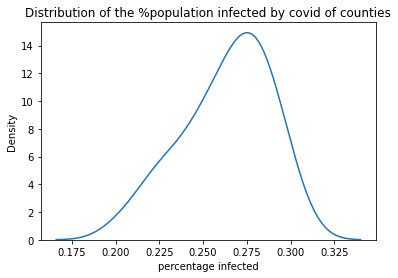

<IPython.core.display.Javascript object>

In [9]:
sns.kdeplot(covid["percentage infected"])
plt.title("Distribution of the %population infected by covid of counties")

# The following code block deals with getting the POPULATION EDUCATION DATA

This is our limiting/constraining data. 

The education levels are as follows:
1. Less than 9th grade	
2. 9th to 12th grade, no diploma	
3. High school graduate (includes equivalency)	
4. Some college, no degree	
5. Associate's degree	
6. Bachelor's degree	
7. Graduate or professional degree	

Each of these has been assigned an arbitrary weightage of 10, 20, 30, 40, 50, 60, and 70 respectively. This helps us calculate a quantity called the "Average education level of a county", given by the formula:

## <center>$avg_{county} =   \frac{{\sum}_{i=1}^{7} (10i) * (Pop_i) } {Pop_{tot}}$</center>

where, 

$pop_i$ is the number of people with $i^{th}$ educational qualification 

$pop_{tot}$ is the total population of that county

In [10]:
# code for getting the education data and weeding out unnecessary columns

edu = pd.read_excel("better education data.xlsx", sheet_name="Data")

for i in np.arange(2, 79, 2):
    edu = edu.drop(columns=[f"Unnamed: {i}"])

<IPython.core.display.Javascript object>

In [11]:
# Code for getting the Average education level of the counties
avg = np.array([])
for j in np.arange(1, len(edu.columns)):
    a = 0
    tot = 0
    for i in np.arange(1, 9):
        tot = tot + (i - 1) * 10 * int(edu[edu.columns[j]][i])
        a = tot / edu[edu.columns[j]][1]

    avg = np.concatenate([avg, a], axis=None)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of the average education level of each county')

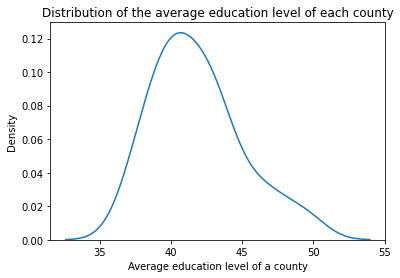

<IPython.core.display.Javascript object>

In [12]:
sns.kdeplot(avg)
plt.xlabel("Average education level of a county")
plt.title("Distribution of the average education level of each county")

# The following code block deals with getting the VOTER DATA

Here, each county is assigned a parameter called "Orientation". This parameter is 0 if a county has more republican voters than democrats and 1 otherwise. Voters who didn't vote for either of the two parties have been neglected as they are not relevant for our problem statement.

In [13]:
# Code for reading data from excel and removing excess
voter = pd.read_excel("currentvotestats.xlsx")
for i in np.arange(3, 10, 2):
    voter = voter.drop(columns=[f"Unnamed: {i}"])

voter = voter.drop(index=67)

<IPython.core.display.Javascript object>

In [14]:
# Calculating orientation of each county
voter["Orientation"] = voter.apply(
    lambda x: 1
    if x["Count of Democratic Voters"] > x["Count of Republican Voters"]
    else 0,
    axis=1,
)

<IPython.core.display.Javascript object>

In [15]:
# Removing the unrequired counties

for i in unavailable:
    if i == "McKean":
        ddx = ddx = voter.where(voter.County == "McKEAN")
    else:
        ddx = voter.where(voter.County == i.upper())
    ind = ddx.dropna().index[0]
    voter = voter.drop(index=ind)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Orientation of counties')

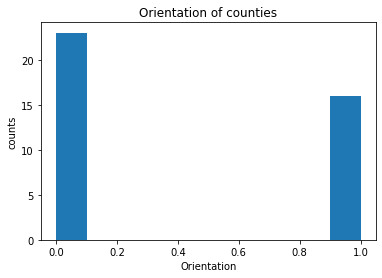

<IPython.core.display.Javascript object>

In [16]:
# plt.hist(voter["Orientation"])
plt.hist(voter["Orientation"])
plt.xlabel("Orientation")
plt.ylabel("counts")
plt.title("Orientation of counties")

## Final Data set-

In [17]:
final = pd.DataFrame()
final["y"] = covid["percentage infected"] * 100
final["x1"] = avg
final["x2"] = voter["Orientation"]

<IPython.core.display.Javascript object>

In [18]:
final

,y,x1,x2
0,27.672473,40.491208,0
1,25.707420,47.243796,1
2,26.436815,38.142131,0
3,27.674188,42.776953,1
5,27.264737,40.136647,1
6,27.227675,40.063942,0
8,22.229056,46.642081,1
9,26.582579,45.312766,0
10,30.355730,40.003007,0
12,28.071696,37.654872,0


<IPython.core.display.Javascript object>

In [19]:
sol = sm.OLS(final["y"], sm.add_constant(final[["x1", "x2"]])).fit()

print(sol.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     13.66
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           3.85e-05
Time:                        01:12:31   Log-Likelihood:                -79.930
No. Observations:                  39   AIC:                             165.9
Df Residuals:                      36   BIC:                             170.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3240      5.292      8.754      0.0

<IPython.core.display.Javascript object>